# Task 2 (Level - Beginner)
**Prediction using Unsupervised ML**

From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

Prepared By: Kirti Rattan

**Importing the Libraries** 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns

**Importing the Dataset**

In [4]:
t2= pd.read_csv(r"Iris.csv")

**Describing the Data**

In [5]:
t2.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
t2.shape

(150, 6)

In [7]:
t2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


**Data Visualization**

Univariate Analysis

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


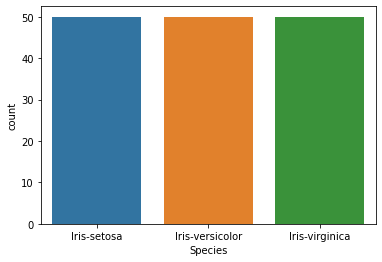

In [8]:
print(t2["Species"].value_counts()) 
sns.countplot(x="Species", data=t2)
plt.show()

Bivariate Analysis

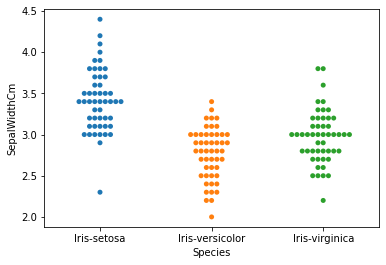

In [10]:
sns.swarmplot(x="Species", y="SepalWidthCm", data=t2)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


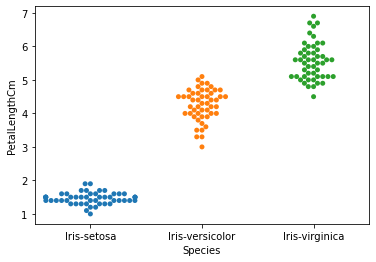

In [12]:
sns.swarmplot(x="Species", y="PetalLengthCm", data=t2)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


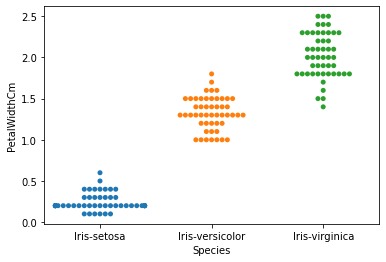

In [14]:
sns.swarmplot(x="Species", y="PetalWidthCm", data=t2)
plt.show()

Multivariate Analysis

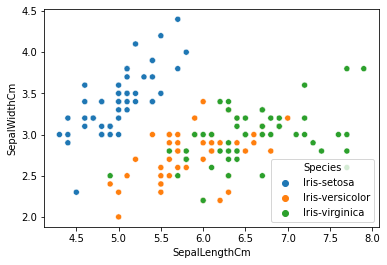

In [16]:
sns.scatterplot(x=t2["SepalLengthCm"], y=t2["SepalWidthCm"], hue=t2["Species"])
plt.show()

**Clustering using K-means**

In [17]:
data = t2[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]

In [26]:
from sklearn.cluster import KMeans
x = t2.iloc[:, [0, 1, 2, 3]].values
dis=[]
k=range(1,10)
for i in k:
    algo=KMeans(n_clusters=i, n_init=100)
    algo.fit(x)
    dis.append(algo.inertia_)

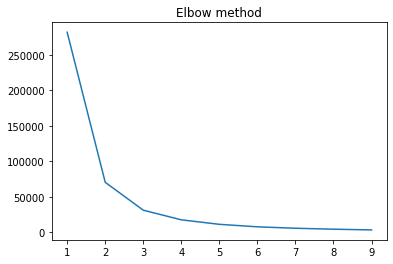

In [27]:
plt.plot(k,dis)
plt.title("Elbow method")
plt.show()

In [28]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

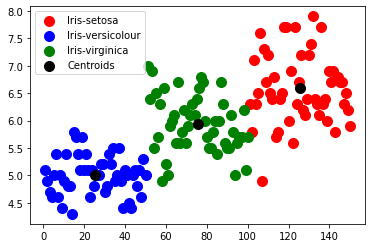

In [29]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()